## ref : https://www.kaggle.com/ngyptr/multi-class-classification-with-lstm

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


def show_table(df):
    print('>>> shape :', df.shape)
    print('>>> number of NA :', df.isna().sum().sum())
    display(df.head(3))
    display(df.tail(3))

/kaggle/input/news-aggregator-dataset/uci-news-aggregator.csv


In [2]:
data = pd.read_csv('../input/news-aggregator-dataset/uci-news-aggregator.csv', usecols=['TITLE', 'CATEGORY'])
show_table(data)

>>> shape : (422419, 2)
>>> number of NA : 0


,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b


,TITLE,CATEGORY
422416,Child who swallowed battery to have reconstruc...,m
422417,Phoenix boy undergoes surgery to repair throat...,m
422418,Phoenix boy undergoes surgery to repair throat...,m


## EDA

In [3]:
# Distribution of Category
data.CATEGORY.value_counts().to_frame().T

,e,b,t,m
CATEGORY,152469,115967,108344,45639


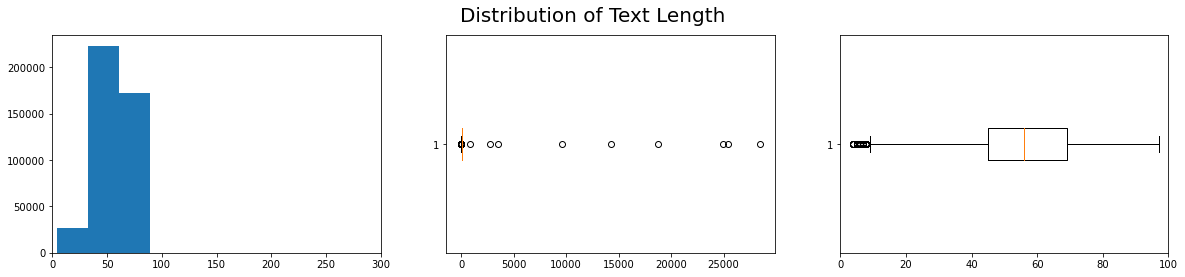

In [4]:
# Distribution of text length
data['TITLE_len'] = data.TITLE.apply(len)

fig, ax = plt.subplots(1, 3, figsize=(20, 4))
ax[0].hist(data.TITLE_len, bins=1000)
ax[0].set_xlim(0, 300)
ax[1].boxplot(data.TITLE_len, vert=False)
ax[2].boxplot(data.TITLE_len, vert=False)
ax[2].set_xlim(0, 100)
plt.suptitle('Distribution of Text Length', size=20)
plt.show()